In [3]:
pip install squarify

In [4]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.9 MB/s eta 0:00:00


In [5]:
# Load EDA Packages
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import squarify
import random

# Load ML Pkgs
# Estimators
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [6]:
# Load Text Cleaning Packages
import neattext.functions as nfx

In [7]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/MBA Project/CCDFullDataset.xlsx')

In [8]:
df

,Review
0,Loved the atmosphere and the cuper comfy seati...
1,"Nice place, no crowd, you will feel comfortabl..."
2,Aparna is gracefully prompt in the order and s...
3,Great location. Parking available. Good for ca...
4,Excellent
...,...
5729,Nice place to drink a cappuccino
5730,Good
5731,Can be more hygiene
5732,"Not maintained well, lot of mosquitoes had com..."


In [9]:
# preview
df.head()

,Review
0,Loved the atmosphere and the cuper comfy seati...
1,"Nice place, no crowd, you will feel comfortabl..."
2,Aparna is gracefully prompt in the order and s...
3,Great location. Parking available. Good for ca...
4,Excellent


In [10]:
# Shape
df.shape

(5734, 1)

In [11]:
# Datatypes
df.dtypes

Review    object
dtype: object

In [12]:
# Checking for missing values
df.isnull().sum()

Review    0
dtype: int64

Text Cleaning

In [13]:
# User handles
df['Clean_Text'] = df['Review'].apply(nfx.remove_userhandles)

In [14]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [15]:
# Punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [16]:
df

,Review,Clean_Text
0,Loved the atmosphere and the cuper comfy seati...,Loved atmosphere cuper comfy seating Service q...
1,"Nice place, no crowd, you will feel comfortabl...",Nice place crowd feel comfortable Good staffs
2,Aparna is gracefully prompt in the order and s...,Aparna gracefully prompt order meet requiremen...
3,Great location. Parking available. Good for ca...,Great location Parking available Good catchup ...
4,Excellent,Excellent
...,...,...
5729,Nice place to drink a cappuccino,Nice place drink cappuccino
5730,Good,Good
5731,Can be more hygiene,hygiene
5732,"Not maintained well, lot of mosquitoes had com...",maintained well lot mosquitoes come in inconve...


TextBlob using wordcloud

In [17]:
# Sentiment Analysis
from textblob import TextBlob, Word, Blobber

In [18]:
def get_sentiment(text):
  global result
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "positive"
  elif sentiment < 0:
    result = "negative"
  return result


In [19]:
# Test Function
get_sentiment("I am so tired")

'negative'

In [20]:
df['Sentiment'] = df['Clean_Text'].apply(get_sentiment)

In [21]:
df.head()

,Review,Clean_Text,Sentiment
0,Loved the atmosphere and the cuper comfy seati...,Loved atmosphere cuper comfy seating Service q...,positive
1,"Nice place, no crowd, you will feel comfortabl...",Nice place crowd feel comfortable Good staffs,positive
2,Aparna is gracefully prompt in the order and s...,Aparna gracefully prompt order meet requiremen...,positive
3,Great location. Parking available. Good for ca...,Great location Parking available Good catchup ...,positive
4,Excellent,Excellent,positive


In [22]:
df['Sentiment'].value_counts()

Sentiment
positive    4715
negative    1019
Name: count, dtype: int64

<Axes: >

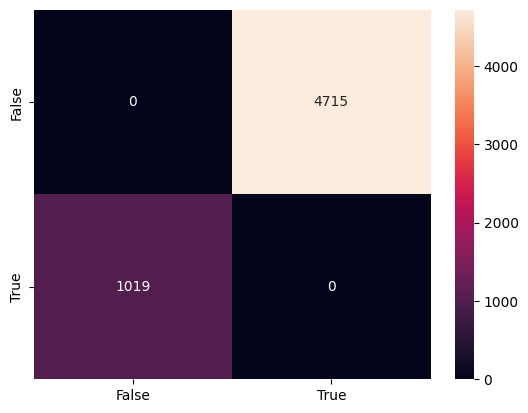

In [23]:
x = df['Sentiment'] == 'positive'
y = df['Sentiment'] == 'negative'

# count the occurrences of each point
c = Counter(zip(x,y))

# fill pandas DataFrame with zeros
dff = pd.DataFrame(0,columns =np.unique(x) , index =np.unique(y))

# count occurencies and prepare data for heatmap
for k,v in c.items():
    dff[k[0]][k[1]] = v

sns.heatmap(dff,annot=True, fmt="d")

Wordcloud using Keyword Extraction

In [24]:
from collections import Counter

In [25]:
def extract_keywords(text,num=50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [26]:
# Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
positive_list = df[df['Sentiment'] == 'positive']['Clean_Text'].tolist()

In [28]:
# Positive Document
positive_docx = ' '.join(positive_list)

In [29]:
positive_docx

'Loved atmosphere cuper comfy seating Service quick prompt staff knew exactly recommend Nice place crowd feel comfortable Good staffs Aparna gracefully prompt order meet requirements order Great location Parking available Good catchup short meetings  official  Excellent Easily visible junction especially night Itâ€™s building similarities burj al arab interior ambiance great great service great food too good views street Hands best CCD ever elevate experience CCD Gourmet levels chef good staff cooperative ND place child friendly Going frequent customer here excellent highly recommend Peaceful ambience Parking space available service late got food hour ordered paneer tikka sandwich wedges average taste hazelnut cold coffee perfect try chocolate fondant  good Heycafe coffee day square lavelle road recently started food menu yum tasty 4 outlets India serving food menus delicious food handcrafted inhouse chefs try  Lovely experience Cafe Coffee Day Square Ordered Hot Chocolate sandwiches F

In [30]:
# Split the document into words
words = re.findall(r'\b\w+\b', positive_docx.lower())

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words
num_most_common = 10  # Change this value if you want more or fewer words
most_common_words = word_counts.most_common(num_most_common)
random.shuffle(most_common_words)

# Print the most common words
for word, count in most_common_words:
    print(word, ':', count)


service : 597
food : 376
nice : 820
coffee : 1408
good : 2011
great : 444
ambience : 426
place : 1628
ccd : 425
staff : 469


{'place': 1574, 'good': 1148, 'coffee': 1133, 'Good': 855, 'service': 511, 'Nice': 504, 'staff': 374, 'ambience': 367, 'CCD': 361, 'time': 328, 'nice': 314, 'food': 297, 'Coffee': 266, 'great': 240, 'cafe': 224, 'Great': 203, 'experience': 199, 'best': 195, 'friends': 193, 'taste': 163, 'location': 145, 'visit': 145, 'like': 145, 'atmosphere': 144, 'day': 144, 'quality': 144, 'work': 137, 'available': 134, 'hangout': 132, 'Best': 130, 'Cafe': 127, 'friendly': 115, 'sit': 114, 'spend': 113, 'menu': 112, 'meeting': 112, 'hot': 96, 'Excellent': 93, 'amazing': 92, 'Staff': 92, 'parking': 91, 'meetings': 89, 'ambiance': 87, 'better': 87, 'cup': 87, 'people': 86, 'space': 84, 'love': 84, 'Service': 83, 'order': 82}


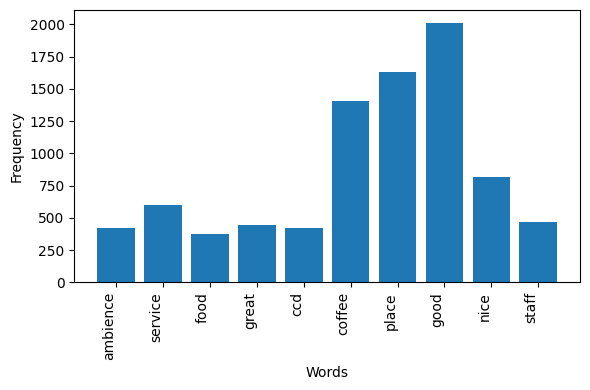

In [31]:
# Extract Keywords
keywords_positive = extract_keywords(positive_docx)

import re
wordfreq = {}

count = str(keywords_positive)

dict(Counter(count.split()))

print(count)

data = { 'ambience' : 426, 'service' : 597, 'food' : 376, 'great' : 444, 'ccd' : 425, 'coffee' : 1408, 'place' : 1628, 'good' : 2011, 'nice' : 820,'staff' : 469 }


# Extract labels and counts
labels = list(data.keys())
counts = list(data.values())

# Create a bar plot
plt.figure(figsize=(6, 4))  # Adjust figure size for better readability
plt.bar(labels, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate x-axis labels for readability with many words
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(docx)
  plt.figure(figsize = (8,6))
  plt.imshow(mywordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

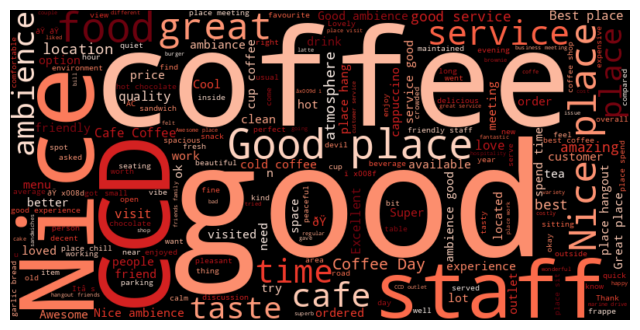

In [33]:
plot_wordcloud(positive_docx)

In [34]:
negative_list = df[df['Sentiment'] == 'negative']['Clean_Text'].tolist()

In [35]:
# Negative Document
negative_docx = ' '.join(negative_list)

In [36]:
negative_docx

'Useless place fraud company cheaters money minded guys company definitely going doomed Avoid place meeting Square today hurriedly came Auto driver didnâ€™t change asked person Cash 2 x Rs 50 exchange Rs 100 told came Square meeting Cashier Waste time charging 300 cover charge Beware cover charges rude staff Donâ€™t waste time going want charge 300 person cover charge completely Donâ€™t Worst company visit work company work 7 month notice period got giving Salary experience  proper management company Location ambience nice service pathetic instance Poor Service  disappointed experience Coffee bad water issueorder placed delayed apologyasked Americanosuper bitter blend Personally CCD dating meeting point cappuccino cold coffee bad service bad staff lazy staff Overpriced coffee Shame fine expensive Lets disadvantage franchise Expensive asked nonspicy sandwich any waiter told options little spiciness So drank tea food drink options overpriced extremely simple coming again Expensive litera

In [37]:
# Split the document into words
words = re.findall(r'\b\w+\b', negative_docx.lower())

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words
num_most_common = 10  # Change this value if you want more or fewer words
most_common_words = word_counts.most_common(num_most_common)
random.shuffle(most_common_words)

# Print the most common words
for word, count in most_common_words:
    print(word, ':', count)


order : 103
food : 100
coffee : 364
bad : 149
staff : 172
ccd : 126
experience : 102
service : 214
worst : 180
place : 159


{'coffee': 319, 'service': 184, 'staff': 146, 'place': 145, 'bad': 130, 'CCD': 101, 'order': 101, 'experience': 99, 'time': 96, 'Worst': 92, 'worst': 87, 'food': 83, 'cold': 81, 'ordered': 75, 'like': 67, 'asked': 62, 'rude': 59, 'taste': 56, 'cafe': 55, 'quality': 46, 'good': 44, 'poor': 42, 'money': 41, 'expensive': 41, 'customer': 40, 'day': 40, 'Coffee': 39, 'water': 38, 'working': 36, 'ambience': 35, 'pathetic': 35, 'AC': 35, 'visit': 33, 'items': 32, '2': 31, 'ice': 31, 'outlet': 31, 'menu': 31, 'drink': 30, 'dirty': 30, 'cappuccino': 29, 'Service': 27, 'customers': 27, 'served': 27, 'serve': 26, 'long': 26, 'Pathetic': 26, 'sandwich': 25, 'tea': 25, 'people': 25}


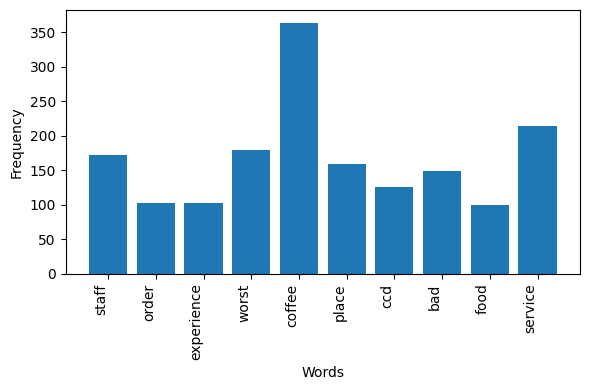

In [38]:
# Extract Keywords
keywords_negative = extract_keywords(negative_docx)

import re
wordfreq = {}

count = str(keywords_negative)

dict(Counter(count.split()))

print(count)


data = { 'staff' : 172, 'order' : 103, 'experience' : 102, 'worst' : 180, 'coffee' : 364, 'place' : 159, 'ccd' : 126, 'bad' : 149, 'food' : 100, 'service' : 214}


# Extract labels and counts
labels = list(data.keys())
counts = list(data.values())

# Create a bar plot
plt.figure(figsize=(6, 4))  # Adjust figure size for better readability
plt.bar(labels, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate x-axis labels for readability with many words
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


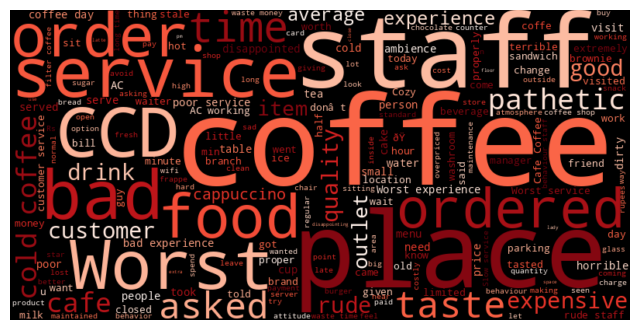

In [39]:
plot_wordcloud(negative_docx)

Data Transformation

In [40]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Sentiment']

In [41]:
Xfeatures

0       Loved atmosphere cuper comfy seating Service q...
1           Nice place crowd feel comfortable Good staffs
2       Aparna gracefully prompt order meet requiremen...
3       Great location Parking available Good catchup ...
4                                               Excellent
                              ...                        
5729                          Nice place drink cappuccino
5730                                                 Good
5731                                              hygiene
5732    maintained well lot mosquitoes come in inconve...
5733                         food items tea related items
Name: Clean_Text, Length: 5734, dtype: object

In [42]:
ylabels

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
5729    positive
5730    positive
5731    positive
5732    negative
5733    negative
Name: Sentiment, Length: 5734, dtype: object

LogisticRegression

In [43]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [44]:
# LogisticRegression Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [45]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=10000))])

# Train and Fit Data
pipe_lr.fit(x_train,y_train)

# Check Accuracy
pipe_lr.score(x_test,y_test)

0.9221382916908774

In [46]:
y_pred = pipe_lr.predict(x_test)

In [47]:
# Regression metrics
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9221382916908774


MultinomialNB

In [48]:
# MultinomialNB Pipeline
from sklearn.naive_bayes import MultinomialNB

In [49]:
pipe_Mnb = Pipeline(steps=[('cv',CountVectorizer()),('Mnb',MultinomialNB())])

# Train and Fit Data
pipe_Mnb.fit(x_train,y_train)

# Check Accuracy
pipe_Mnb.score(x_test,y_test)

0.8791400348634515

In [50]:
y_pred = pipe_Mnb.predict(x_test)

Accuracy:  0.8791400348634515
Classification report
              precision    recall  f1-score   support

    negative       0.73      0.55      0.63       318
    positive       0.90      0.95      0.93      1403

    accuracy                           0.88      1721
   macro avg       0.82      0.75      0.78      1721
weighted avg       0.87      0.88      0.87      1721

Confusion matrix
[[ 174  144]
 [  64 1339]]


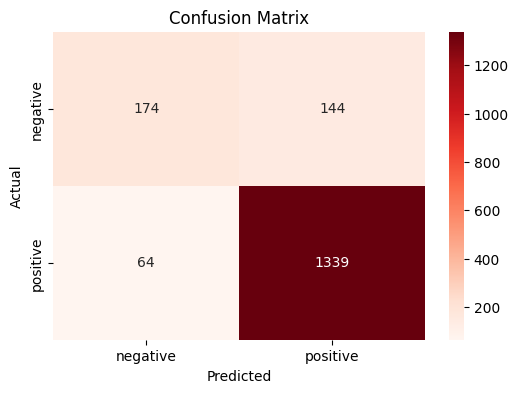

In [51]:
# Classifier metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print("Classification report")
print(metrics.classification_report(y_test, y_pred, labels=np.unique(y_pred)))
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))

# Create a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


LinearSVC

In [52]:
# LinearSVC Pipeline
from sklearn.svm import LinearSVC

In [53]:
pipe_Lsvc = Pipeline(steps=[('cv',CountVectorizer()),('Lsvc',LinearSVC(dual=False))])

# Train and Fit Data
pipe_Lsvc.fit(x_train,y_train)

# Check Accuracy
pipe_Lsvc.score(x_test,y_test)

0.9081929110981988

In [54]:
y_pred = pipe_Lsvc.predict(x_test)

Accuracy:  0.9081929110981988
Classification report
              precision    recall  f1-score   support

    negative       0.79      0.68      0.73       318
    positive       0.93      0.96      0.94      1403

    accuracy                           0.91      1721
   macro avg       0.86      0.82      0.84      1721
weighted avg       0.90      0.91      0.91      1721

Confusion matrix
[[ 216  102]
 [  56 1347]]


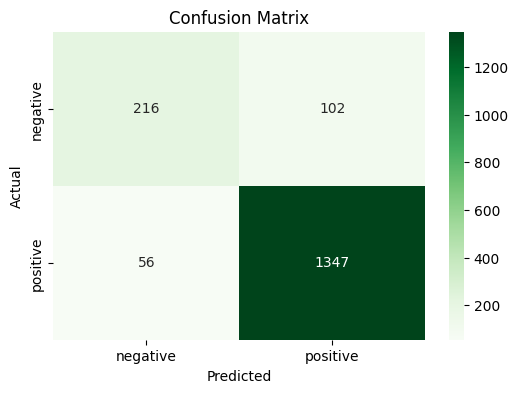

In [55]:
# Classifier metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print("Classification report")
print(metrics.classification_report(y_test, y_pred, labels=np.unique(y_pred)))
print("Confusion matrix")
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Create a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


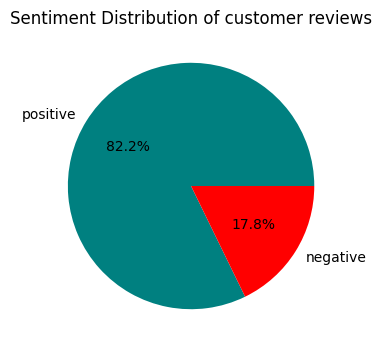

In [56]:
# Data
sentiment_data = {"positive": 4715, "negative": 1019}

# Define custom colors
colors = ['teal', 'red']

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_data.values(), labels=sentiment_data.keys(), autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution of customer reviews")
plt.show()


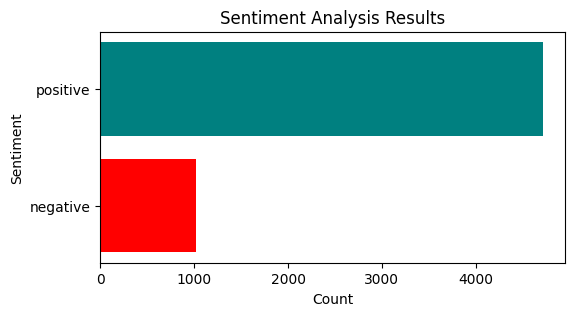

In [57]:
# Define custom colors
colors = ['teal', 'red']

# Extracting labels and counts from the data dictionary
sentiment_labels = list(sentiment_data.keys())
sentiment_counts = list(sentiment_data.values())

# Horizontal bar chart
plt.figure(figsize=(6, 3))
plt.barh(sentiment_labels, sentiment_counts, color=colors)
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Sentiment Analysis Results")
plt.gca().invert_yaxis()  # Invert y-axis to display positive at the top
plt.show()


In [58]:
positive_data = {'ambience' : 426, 'service' : 597, 'food' : 376, 'great' : 444, 'ccd' : 425, 'coffee' : 1408, 'place' : 1628, 'good' : 2011, 'nice' : 820,'staff' : 469}
negative_data = {'staff' : 172, 'order' : 103, 'experience' : 102, 'worst' : 180, 'coffee' : 364, 'place' : 159, 'ccd' : 126, 'bad' : 149, 'food' : 100, 'service' : 214}

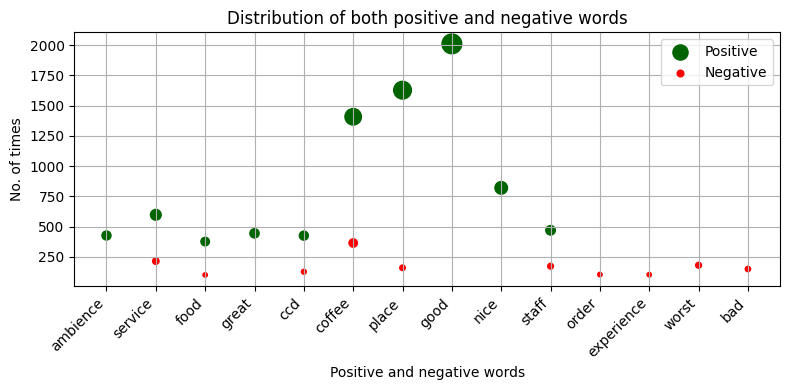

In [59]:
# Extracting keys and values from positive and negative data
positive_words = list(positive_data.keys())
positive_values = list(positive_data.values())

negative_words = list(negative_data.keys())
negative_values = list(negative_data.values())

# Creating the bubble chart
plt.figure(figsize=(8,4))

# Plotting positive data
plt.scatter(positive_words, positive_values, s=[x/10 for x in positive_values], color='darkgreen', alpha=1, label='Positive')

# Plotting negative data
plt.scatter(negative_words, negative_values, s=[x/10 for x in negative_values], color='red', alpha=1, label='Negative')

plt.xlabel('Positive and negative words')
plt.ylabel('No. of times')
plt.title('Distribution of both positive and negative words')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


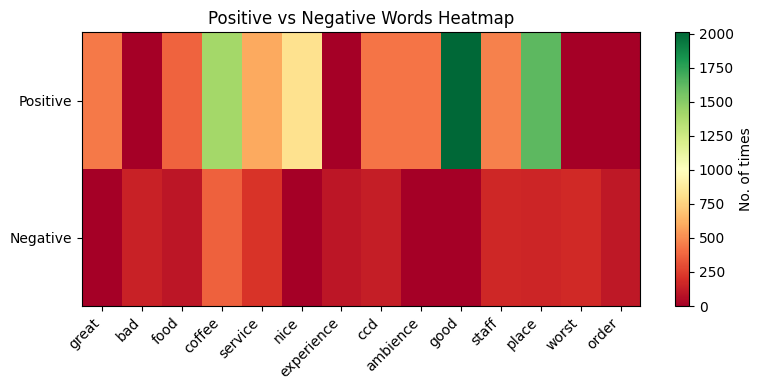

In [60]:
# Extracting all unique keys to form the complete set of words
all_keys = set(positive_data.keys()).union(set(negative_data.keys()))

# Initialize an empty matrix
heatmap_data = np.zeros((len(all_keys), 2))

# Fill the matrix with positive and negative values
for i, key in enumerate(all_keys):
    heatmap_data[i, 0] = positive_data.get(key, 0)
    heatmap_data[i, 1] = negative_data.get(key, 0)

# Plotting the heatmap
plt.figure(figsize=(8, 4))
plt.imshow(heatmap_data.T, cmap='RdYlGn', aspect='auto')
plt.colorbar(label='No. of times')
plt.title('Positive vs Negative Words Heatmap')
plt.xticks(np.arange(len(all_keys)), all_keys, rotation=45, ha='right')
plt.yticks([0, 1], ['Positive', 'Negative'])
plt.tight_layout()
plt.show()


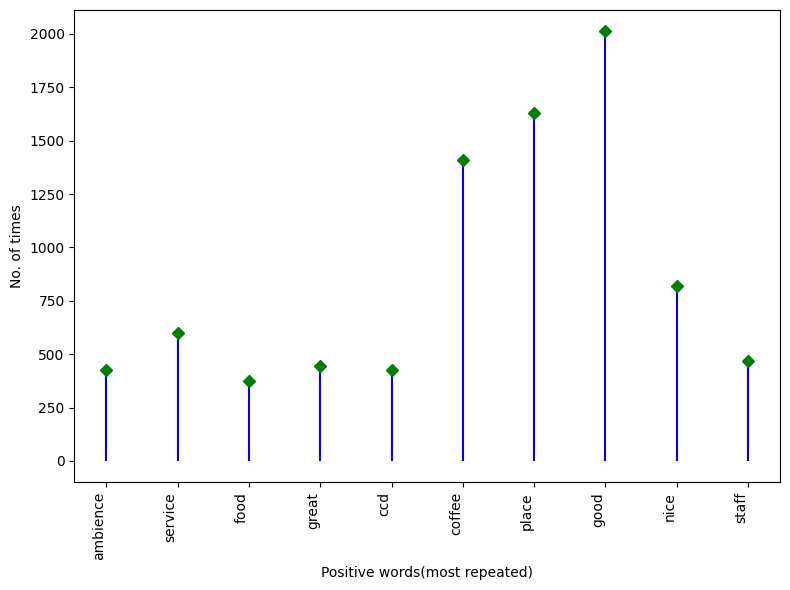

In [61]:
# Extract labels and counts
labels = list(positive_data.keys())
counts = list(positive_data.values())

# Create a vertical lollipop plot with customized colors
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability

# Change lollipop color to green and line color to red
plt.stem(labels, counts, linefmt='b-', markerfmt='gD', basefmt=' ')

plt.xlabel('Positive words(most repeated)')
plt.ylabel('No. of times')

# Rotate x-axis labels for readability with many words
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


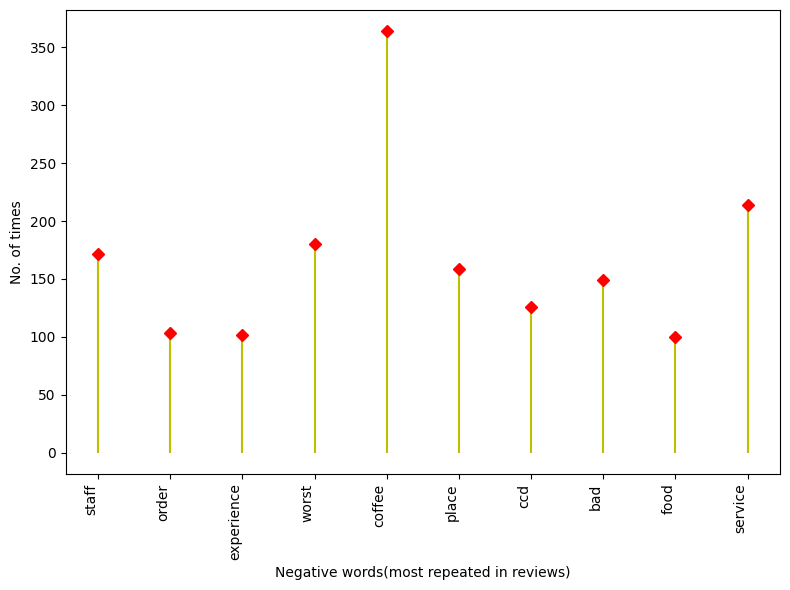

In [62]:
# Extract labels and counts
labels = list(negative_data.keys())
counts = list(negative_data.values())

# Create a vertical lollipop plot with customized colors
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability

# Change lollipop color to green and line color to red
plt.stem(labels, counts, linefmt='y-', markerfmt='rD', basefmt=' ')

plt.xlabel('Negative words(most repeated in reviews)')
plt.ylabel('No. of times')

# Rotate x-axis labels for readability with many words
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


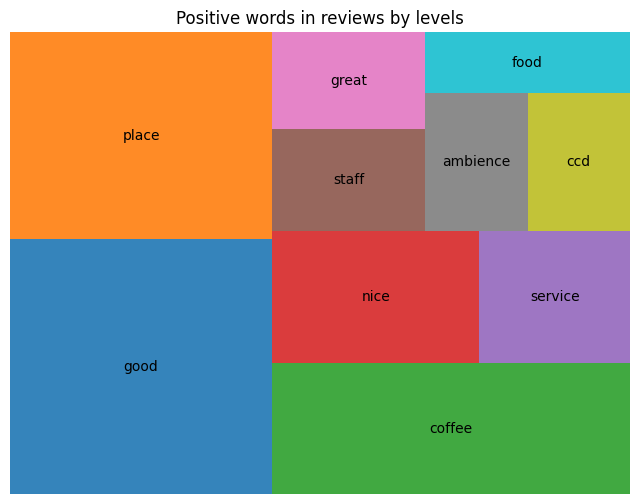

In [63]:
# Sort the data by values
sorted_data = sorted(positive_data.items(), key=lambda x: x[1], reverse=True)

# Extract labels and sizes
labels = [item[0] for item in sorted_data]
sizes = [item[1] for item in sorted_data]

# Define custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Set the figure size
plt.figure(figsize=(8, 6))

# Create tree map with custom colors
squarify.plot(sizes=sizes, label=labels, color=custom_colors, alpha=0.9)
plt.title('Positive words in reviews by levels')
plt.axis('off')
plt.show()


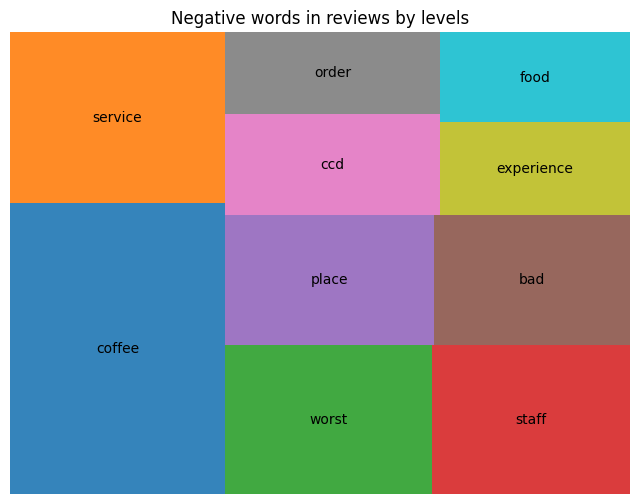

In [64]:
# Sort the data by values
sorted_data = sorted(negative_data.items(), key=lambda x: x[1], reverse=True)

# Extract labels and sizes
labels = [item[0] for item in sorted_data]
sizes = [item[1] for item in sorted_data]

# Define custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Set the figure size
plt.figure(figsize=(8, 6))

# Create tree map with custom colors
squarify.plot(sizes=sizes, label=labels, color=custom_colors, alpha=0.9)
plt.title('Negative words in reviews by levels')
plt.axis('off')
plt.show()
